In [2]:
import os
import json
import random
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
RAW_TRAIN_SRC_PATH = 'train_src.txt'
RAW_TRAIN_TAR_PATH = 'train_tar.txt'
RAW_TEST_SRC_PATH = 'test_src.txt'
RAW_TEST_TAR_PATH = 'test_tar.txt'

PP_DATA_PATH = 'pp_data.json'
VOCAB_PATH = 'vocab.json'

B_DATA_PATH = os.path.join('B', PP_DATA_PATH) # with entity for B
B_VOCAB_PATH = os.path.join('B', VOCAB_PATH)
BC_DATA_PATH = os.path.join('BC', PP_DATA_PATH) # with entity for B and C
BC_VOCAB_PATH = os.path.join('BC', VOCAB_PATH)
BCR_DATA_PATH = os.path.join('BCR', PP_DATA_PATH) # with entity for B, C and R
BCR_VOCAB_PATH = os.path.join('BCR', VOCAB_PATH)
BCRY_DATA_PATH = os.path.join('BCRY', PP_DATA_PATH) # with entity for B, C, R and Y
BCRY_VOCAB_PATH = os.path.join('BCRY', VOCAB_PATH)
Colorless_DATA_PATH = os.path.join('colorless', PP_DATA_PATH) # with no entity in level 2 and 3
Colorless_VOCAB_PATH = os.path.join('colorless', VOCAB_PATH)
ALL_DATA_PATH = os.path.join('all', PP_DATA_PATH) # everything as usual
ALL_VOCAB_PATH = os.path.join('all', VOCAB_PATH)

In [4]:
# load raw data file
def readTxt(path):
    with open(path, 'r') as f:
        return f.read().splitlines()

raw_train_src_list = readTxt(RAW_TRAIN_SRC_PATH)
raw_train_tar_list = readTxt(RAW_TRAIN_TAR_PATH)
raw_test_src_list = readTxt(RAW_TEST_SRC_PATH)
raw_test_tar_list = readTxt(RAW_TEST_TAR_PATH)
raw_train_size = len(raw_train_src_list)
raw_test_size = len(raw_test_src_list)
print(raw_train_size)
print(raw_test_size)

8922
2231


In [5]:
# set up levels of color list
B_list = ['blue', 'purple', 'navy']
C_list = ['green', 'olive', 'lime']
R_list = ['red', 'pink', 'orange']
Y_list = ['yellow', 'brown', 'tan']
colour_list = [B_list, C_list, R_list, Y_list]
level_1_list = [l[0] for l in colour_list]
level_2_list = [l[1] for l in colour_list]
level_3_list = [l[2] for l in colour_list]

In [6]:
print(level_1_list)
print(level_2_list)
print(level_3_list)

['blue', 'green', 'red', 'yellow']
['purple', 'olive', 'pink', 'brown']
['navy', 'lime', 'orange', 'tan']


In [7]:
# colour analysis
# test
level_1_count = len([seq for c in level_1_list for seq in raw_test_src_list if c in seq]) / raw_test_size
level_12_count = level_1_count + len([seq for c in level_2_list for seq in raw_test_src_list if c in seq]) / raw_test_size
level_123_count = level_12_count + len([seq for c in level_3_list for seq in raw_test_src_list if c in seq]) / raw_test_size


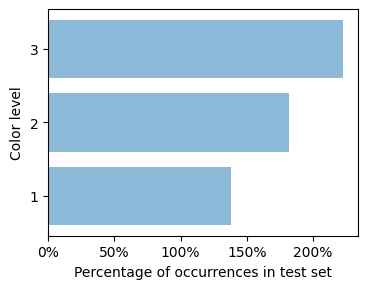

In [8]:
level_count_list = [level_1_count, level_12_count, level_123_count]
y_pos = np.arange(len(level_count_list))
fig, ax = plt.subplots(figsize=(4, 3), dpi=100)
plt.barh(y_pos, level_count_list, align='center', alpha=0.5)
plt.yticks(y_pos, ['1', '2', '3'])
vals = ax.get_xticks()
ax.set_xticklabels(['{:,.0%}'.format(x) for x in vals])
plt.ylabel('Color level')
plt.xlabel('Percentage of occurrences in test set')
plt.show()
fig.savefig('test_color_level.png', format='png', dpi=300, bbox_inches = 'tight')

In [9]:
# tokenization
tk_train_src_list = [seq.split() for seq in raw_train_src_list]
tk_train_tar_list = [seq.split() for seq in raw_train_tar_list]
tk_test_src_list = [seq.split() for seq in raw_test_src_list]
tk_test_tar_list = [seq.split() for seq in raw_test_tar_list]

In [10]:
index = random.choice(np.arange(raw_train_size))
print(tk_train_src_list[index])
print(tk_train_tar_list[index])
index = random.choice(np.arange(raw_test_size))
print(tk_test_src_list[index])
print(tk_test_tar_list[index])

['you', 'must', 'walk', 'through', 'the', 'yellow', 'room', 'to', 'get', 'to', 'the', 'lime', 'room']
['F', '&', 'Y', 'F', 'C']
['go', 'through', 'the', 'orange', 'room', 'to', 'the', 'green', 'room']
['F', '&', 'R', 'F', 'C']


In [11]:
# token frequence dictionary
src_c = Counter()

for train_src in tk_train_src_list:
    src_c.update(train_src)
for test_src in tk_test_src_list:
    src_c.update(test_src)

tar_c = Counter()
for train_tar in tk_train_tar_list:
    tar_c.update(train_tar)
for test_tar in tk_test_tar_list:
    tar_c.update(test_tar)

In [12]:
src_freq_dict = dict(src_c)
print(len(src_c))
print(src_c.most_common())

193
[('the', 19623), ('room', 18760), ('to', 11655), ('go', 6898), ('through', 5429), ('blue', 4226), ('green', 4148), ('red', 3920), ('yellow', 3502), ('move', 2565), ('and', 2309), ('or', 2004), ('into', 1934), ('get', 1752), ('enter', 1632), ('then', 1447), ('purple', 1284), ('pink', 1265), ('navy', 1254), ('olive', 1213), ('lime', 1213), ('orange', 1157), ('not', 1138), ('brown', 976), ('tan', 976), ('avoiding', 963), ('but', 881), ('that', 820), ('by', 724), ('reach', 681), ('without', 675), ('going', 609), ('area', 575), ('avoid', 565), ('chair', 540), ('robot', 535), ('while', 527), ('t', 515), ('box', 514), ('only', 505), ('rooms', 452), ('is', 445), ('do', 431), ('from', 427), ('pass', 384), ('a', 368), ('push', 358), ('isn', 335), ('large', 316), ('either', 310), ('travel', 305), ('via', 277), ('way', 272), ('first', 268), ('towards', 265), ('entering', 262), ('in', 254), ('you', 239), ('square', 235), ('small', 216), ('object', 216), ('using', 208), ('proceed', 206), ('up', 

In [13]:
tar_freq_dict = dict(tar_c)
print(len(tar_c))
print(tar_c.most_common())

11
[('F', 18054), ('&', 10888), ('C', 6223), ('B', 6101), ('R', 5918), ('Y', 5030), ('G', 3987), ('!', 3987), ('|', 1970), ('X', 428), ('Z', 311)]


In [14]:
# generate source vocabulary index dictionary
src_vocab_dict = dict()
src_vocab_dict['<s>'] = 0
src_vocab_dict['</s>'] = 1
src_vocab_dict['<pad>'] = 2
src_vocab_dict['<unk>'] = 3

i = len(src_vocab_dict)

for token in src_freq_dict:
    src_vocab_dict[token] = i
    i += 1

print(len(src_vocab_dict))

197


In [15]:
src_index_dict = {v:k for (k,v) in src_vocab_dict.items()}

In [16]:
# generate target vocabulary index dictionary
tar_vocab_dict = dict()
tar_vocab_dict['<s>'] = 0
tar_vocab_dict['</s>'] = 1
tar_vocab_dict['<pad>'] = 2

i = len(tar_vocab_dict)

for token in tar_freq_dict:
    tar_vocab_dict[token] = i
    i += 1

print(len(tar_vocab_dict))

14


In [17]:
tar_index_dict = {v:k for (k,v) in tar_vocab_dict.items()}

In [18]:
# encoder inputs
train_encoder_inputs, test_encoder_inputs = [], []

for tk_train_src in tk_train_src_list:
    train_encoder_inputs.append([src_vocab_dict[token] for token in tk_train_src])

for tk_test_src in tk_test_src_list:
    test_encoder_inputs.append([src_vocab_dict[token] for token in tk_test_src])

In [19]:
# decoder inputs
train_decoder_inputs, test_decoder_inputs = [], []

for tk_train_tar in tk_train_tar_list:
    train_decoder_inputs.append([tar_vocab_dict[token] for token in tk_train_tar])

for tk_test_tar in tk_test_tar_list:
    test_decoder_inputs.append([tar_vocab_dict[token] for token in tk_test_tar])

In [20]:
# decoder targets
train_decoder_targets = [id_tar_seq for id_tar_seq in train_decoder_inputs]
test_decoder_targets = [id_tar_seq for id_tar_seq in test_decoder_inputs]

In [21]:
print(len(train_encoder_inputs))
print(len(test_encoder_inputs))
print(len(train_decoder_inputs))
print(len(test_decoder_inputs))
print(len(train_decoder_targets))
print(len(test_decoder_targets))

8922
2231
8922
2231
8922
2231


In [22]:
train_dict = dict()
test_dict = dict()

train_dict['encoder_inputs'] = train_encoder_inputs
train_dict['decoder_inputs'] = train_decoder_inputs
train_dict['decoder_targets'] = train_decoder_targets

test_dict['encoder_inputs'] = test_encoder_inputs
test_dict['decoder_inputs'] = test_decoder_inputs
test_dict['decoder_targets'] = test_decoder_targets

# All

In [23]:
# train_size
print(len(train_encoder_inputs))
print(len(test_encoder_inputs))

8922
2231


In [24]:
# output as json
pp_data = dict()
pp_data['train_dict'] = train_dict
pp_data['test_dict'] = test_dict

vocab_dict = dict()
vocab_dict['nl_vocab_dict'] = src_vocab_dict
vocab_dict['fl_vocab_dict'] = tar_vocab_dict

with open(ALL_DATA_PATH, 'w') as f:
    json.dump(pp_data, f, ensure_ascii=False)

with open(ALL_VOCAB_PATH, 'w') as f:
    json.dump(vocab_dict, f, ensure_ascii=False)

# Colorless

In [25]:
B_list = ['purple', 'navy'] # blue
C_list = ['olive', 'lime'] # green
R_list = ['pink', 'orange'] # red
Y_list = ['brown', 'tan'] # yellow

for i in range(len(train_dict['encoder_inputs'])):
    train_src = train_dict['encoder_inputs'][i]
    for b in B_list:
        if src_vocab_dict[b] in train_src:
            idx_list = [i for i, t in enumerate(train_src) if t == src_vocab_dict[b]]
            for idx in idx_list:
                train_dict['encoder_inputs'][i][idx] = src_vocab_dict['blue']
    for c in C_list:
        if src_vocab_dict[c] in train_src:
            idx_list = [i for i, t in enumerate(train_src) if t == src_vocab_dict[c]]
            for idx in idx_list:
                train_dict['encoder_inputs'][i][idx] = src_vocab_dict['green']
    for r in R_list:
        if src_vocab_dict[r] in train_src:
            idx_list = [i for i, t in enumerate(train_src) if t == src_vocab_dict[r]]
            for idx in idx_list:
                train_dict['encoder_inputs'][i][idx] = src_vocab_dict['red']
    for y in Y_list:
        if src_vocab_dict[y] in train_src:
            idx_list = [i for i, t in enumerate(train_src) if t == src_vocab_dict[y]]
            for idx in idx_list:
                train_dict['encoder_inputs'][i][idx] = src_vocab_dict['yellow']

In [26]:
unique_encoder_inputs = []
unique_decoder_inputs = []
unique_decoder_targets = []
for i in range(len(train_dict['encoder_inputs'])):
    train_seq = train_dict['encoder_inputs'][i]
    if train_seq not in unique_encoder_inputs:
        unique_encoder_inputs.append(train_seq)
        unique_decoder_inputs.append(train_dict['decoder_inputs'][i])
        unique_decoder_targets.append(train_dict['decoder_targets'][i])

In [27]:
train_dict['encoder_inputs'] = unique_encoder_inputs
train_dict['decoder_inputs'] = unique_decoder_inputs
train_dict['decoder_targets'] = unique_decoder_targets

In [28]:
index = random.choice(np.arange(len(train_dict['encoder_inputs'])))
en_input = train_dict['encoder_inputs'][index]
de_target = train_dict['decoder_targets'][index]
print(' '.join([src_index_dict[t] for t in en_input]))
print(' '.join([tar_index_dict[t] for t in de_target]))

enter the green room and exit into the yellow room
F & C F Y


In [29]:
len(train_dict['encoder_inputs'])

2118

In [29]:
# output as json
pp_data = dict()
pp_data['train_dict'] = train_dict
pp_data['test_dict'] = test_dict

vocab_dict = dict()
vocab_dict['nl_vocab_dict'] = src_vocab_dict
vocab_dict['fl_vocab_dict'] = tar_vocab_dict

with open(Colorless_DATA_PATH, 'w') as f:
    json.dump(pp_data, f, ensure_ascii=False)

with open(Colorless_VOCAB_PATH, 'w') as f:
    json.dump(vocab_dict, f, ensure_ascii=False)

## B

In [30]:
def addEntity(tk_en, tk_de):
    idx_en_in = [src_vocab_dict[token] for token in tk_en]
    idx_de_in = [tar_vocab_dict[token] for token in tk_de]
    idx_de_out = [idx for idx in idx_de_in]
    train_dict['encoder_inputs'].append(idx_en_in)
    train_dict['decoder_inputs'].append(idx_de_in)
    train_dict['decoder_targets'].append(idx_de_out)

addEntity(['purple'], ['B'])
addEntity(['navy'], ['B'])

In [31]:
len(train_dict['encoder_inputs'])

2120

In [32]:
# output as json
pp_data = dict()
pp_data['train_dict'] = train_dict
pp_data['test_dict'] = test_dict

vocab_dict = dict()
vocab_dict['nl_vocab_dict'] = src_vocab_dict
vocab_dict['fl_vocab_dict'] = tar_vocab_dict

with open(B_DATA_PATH, 'w') as f:
    json.dump(pp_data, f, ensure_ascii=False)

with open(B_VOCAB_PATH, 'w') as f:
    json.dump(vocab_dict, f, ensure_ascii=False)

## BC

In [33]:
addEntity(['olive'], ['C'])
addEntity(['lime'], ['C'])

In [34]:
len(train_dict['encoder_inputs'])

2122

In [35]:
set([type(seq) for seq in train_dict['decoder_targets']])

{list}

In [36]:
# output as json
pp_data = dict()
pp_data['train_dict'] = train_dict
pp_data['test_dict'] = test_dict

vocab_dict = dict()
vocab_dict['nl_vocab_dict'] = src_vocab_dict
vocab_dict['fl_vocab_dict'] = tar_vocab_dict

with open(BC_DATA_PATH, 'w') as f:
    json.dump(pp_data, f, ensure_ascii=False)

with open(BC_VOCAB_PATH, 'w') as f:
    json.dump(vocab_dict, f, ensure_ascii=False)

## BCR

In [37]:
addEntity(['pink'], ['R'])
addEntity(['orange'], ['R'])

In [38]:
len(train_dict['encoder_inputs'])

2124

In [39]:
# output as json
pp_data = dict()
pp_data['train_dict'] = train_dict
pp_data['test_dict'] = test_dict

vocab_dict = dict()
vocab_dict['nl_vocab_dict'] = src_vocab_dict
vocab_dict['fl_vocab_dict'] = tar_vocab_dict

with open(BCR_DATA_PATH, 'w') as f:
    json.dump(pp_data, f, ensure_ascii=False)

with open(BCR_VOCAB_PATH, 'w') as f:
    json.dump(vocab_dict, f, ensure_ascii=False)

## BCRY

In [40]:
addEntity(['brown'], ['Y'])
addEntity(['tan'], ['Y'])

In [41]:
len(train_dict['encoder_inputs'])

2126

In [42]:
# output as json
pp_data = dict()
pp_data['train_dict'] = train_dict
pp_data['test_dict'] = test_dict

vocab_dict = dict()
vocab_dict['nl_vocab_dict'] = src_vocab_dict
vocab_dict['fl_vocab_dict'] = tar_vocab_dict

with open(BCRY_DATA_PATH, 'w') as f:
    json.dump(pp_data, f, ensure_ascii=False)

with open(BCRY_VOCAB_PATH, 'w') as f:
    json.dump(vocab_dict, f, ensure_ascii=False)